# PRICE PREDICTION

In [414]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zameencom-property-data-pakistan/Property.csv
/kaggle/input/zameencom-property-data-pakistan/Property_with_Feature_Engineering.csv


In [415]:
# LOADING OUR DATA
properties_fe = pd.read_csv("../input/zameencom-property-data-pakistan/Property_with_Feature_Engineering.csv")
properties_fe.head()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


In [416]:
# Checking cities for subsetting later
print(properties_fe["city"].unique())
properties_fe.shape

['Lahore' 'Karachi' 'Islamabad' 'Faisalabad' 'Rawalpindi']


(191393, 24)

In [417]:
df = properties_fe[properties_fe["city"] == "Faisalabad"] # Subsetting the data with respect to Karachi
df.head()
df.shape

(9080, 24)

In [418]:
# dropping unnecessary columns
col_names = ["location_id","page_url","province_name","locality","area_marla","year","month","day","agency","agent","latitude","longitude","property_id","property_type","price_bin","purpose","date_added","city","area"]
df = df.drop(col_names, axis=1)

In [419]:
df = df.reset_index()
df = df.drop("index",axis=1)
df.head()

,price,location,baths,area_sqft,bedrooms
0,8500000,Muslim Town,5,1361.25,4
1,25000000,Millat Town,6,6534.02,5
2,6000000,Raza Abad,2,680.63,4
3,60000000,Satiana Road,6,8712.03,6
4,8500000,Abdullahpur,3,1361.25,4


In [420]:
# Checking if any null values in the df
df.isna().sum()

price        0
location     0
baths        0
area_sqft    0
bedrooms     0
dtype: int64

In [421]:
# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

df.shape

(9080, 5)

In [422]:
df['bedrooms'].unique()

array([ 4,  5,  6,  3, 10,  2,  0,  1,  7,  8,  9, 11])

# DATA CLEANING

In [423]:
df[df['bedrooms']>13]

,price,location,baths,area_sqft,bedrooms


In [424]:
df['baths'].unique()

array([ 5,  6,  2,  3,  4,  8,  7,  1,  0, 10,  9])

In [425]:
df = df.drop(df[(df['baths']==0) & (df['bedrooms'] > 3)].index)
df

,price,location,baths,area_sqft,bedrooms
0,8500000,Muslim Town,5,1361.25,4
1,25000000,Millat Town,6,6534.02,5
2,6000000,Raza Abad,2,680.63,4
3,60000000,Satiana Road,6,8712.03,6
4,8500000,Abdullahpur,3,1361.25,4
...,...,...,...,...,...
9075,30000,Nisar Colony,0,680.63,0
9076,55000000,Canal Road,0,4356.02,0
9077,9500000,Four Season Housing,3,1361.25,3
9078,6500000,Four Season Housing,0,816.75,0


In [426]:
df.drop(df[(df['bedrooms']==0) | (df['baths']==0)].index, inplace=True)

In [427]:
df[df["baths"] > df["bedrooms"]].head(25)

,price,location,baths,area_sqft,bedrooms
0,8500000,Muslim Town,5,1361.25,4
1,25000000,Millat Town,6,6534.02,5
5,8900000,Muslim Town,5,1361.25,4
6,12500000,Wapda City,5,2722.51,4
9,25000,Muslim Town,3,2178.01,2
13,14500000,Satiana Road,6,2722.51,4
15,45000000,Madina Town,6,5445.02,5
17,6800000,Rachna Town,3,1361.25,2
18,10500000,Eden Valley,4,1361.25,3
21,7200000,Samundari Road,6,1361.25,3


# OUTLIERS DETECTION AND REMOVALS:

In [428]:
df['price_per_sqft'] = df['price'] / df['area_sqft']
df.head()

,price,location,baths,area_sqft,bedrooms,price_per_sqft
0,8500000,Muslim Town,5,1361.25,4,6244.260790
1,25000000,Millat Town,6,6534.02,5,3826.128478
2,6000000,Raza Abad,2,680.63,4,8815.362238
3,60000000,Satiana Road,6,8712.03,6,6887.028626
4,8500000,Abdullahpur,3,1361.25,4,6244.260790


We have add a column of price_per_sqft for our feature engineering so that we can remove the outliers from our data....

In [429]:
len(df['location'].unique())

254

In [430]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(40)

location
Canal Road                                180
Eden Valley                               164
Eden Gardens                              158
Satiana Road                              152
Madina Town                               102
Wapda City                                 87
Muslim Town                                45
Peoples Colony No 2                        42
Samundari Road                             42
Millat Town                                41
Jaranwala Road                             37
Peoples Colony No 1                        37
Green Town                                 35
Khayaban Colony 2                          33
Sargodha Road                              33
Al Noor Garden                             33
Mansoorabad                                32
Ghulam Mohammad Abad                       30
Others                                     28
Khayaban Colony                            25
Saeed Colony                               25
Nisar Colony             

In [431]:
len(location_stats[location_stats <= 10])

199

In [432]:
locations_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x:'others' if x in locations_less_than_10 else x)

In [433]:
df['location'].nunique()

56

Firstly there were 199 unique locations and now we are having only 102 unique locations after dimensionality reduction

In [434]:
df[df['area_sqft'] / df['bedrooms'] < 300]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
2,6000000,Raza Abad,2,680.63,4,8815.362238
7,4500000,others,3,816.75,3,5509.641873
10,8000000,others,3,1361.25,6,5876.951331
12,5000000,Usman Town,2,816.75,3,6121.824304
16,5000000,others,5,816.75,5,6121.824304
...,...,...,...,...,...,...
8680,8000000,Shahbaz Town,4,816.75,4,9794.918886
8684,5500000,Khayaban Colony,3,871.20,3,6313.131313
8724,3300000,others,3,544.50,3,6060.606061
8725,8500000,Jaranwala Road,4,1089.00,5,7805.325987


In [435]:
df.drop(df[df['area_sqft'] / df['bedrooms'] < 300].index, inplace = True)

In [436]:
df['price_per_sqft'].describe()

count     2005.000000
mean      4322.880714
std       3956.823440
min          0.481716
25%         24.487147
50%       4693.366708
75%       6978.879706
max      36730.945822
Name: price_per_sqft, dtype: float64

Notice how much it is having standard deviation we will reduce it...

In [437]:
# removing price_per_sqft outliers 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (m-std)) & (subdf['price_per_sqft'] <= (m+std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [438]:
df = remove_pps_outliers(df)
df.shape

(1273, 6)

In [439]:
def plot_scatter_chart(df, location):
    bedroom_2 = df[(df['location'] == location) & (df['bedrooms'] == 2)]
    bedroom_3 = df[(df['location'] == location) & (df['bedrooms'] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bedroom_2['area_sqft'], bedroom_2['price']/100000, color='blue', label="2 Bedroom", s=50)
    plt.scatter(bedroom_3['area_sqft'], bedroom_3['price']/100000, marker='+', color="green", label="3 Bedroom", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

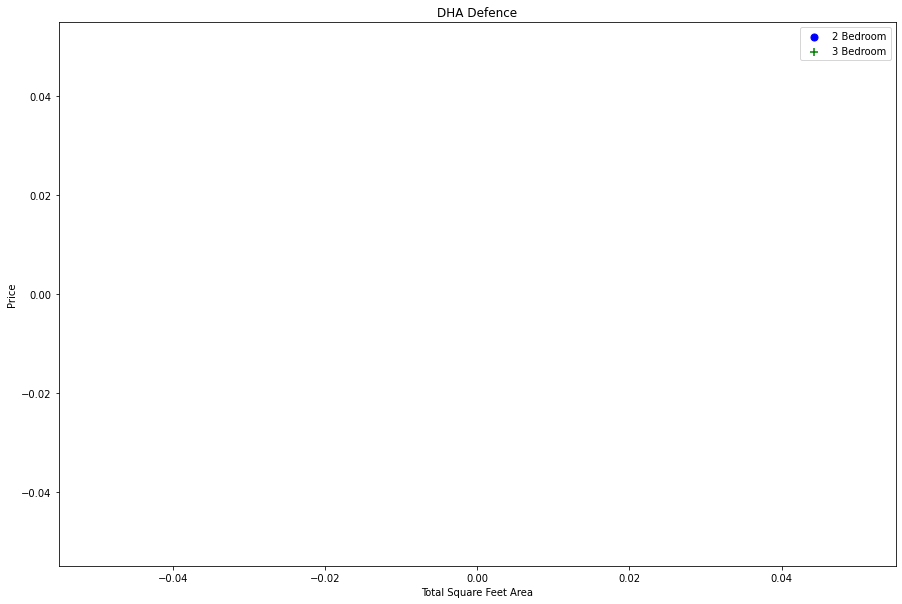

In [440]:
plot_scatter_chart(df, "DHA Defence")

Notice in the above graph that there are some properties having 3 bedrooms still in less price than 2 bedrooms properties in a specfied location. Now they can also be considered as outliers and we should also remove them so that they cannot affect our model performance

In [441]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            bhk_stats[bedroom] = {
                'mean' : np.mean(bedroom_df["price_per_sqft"]),
                'std' : np.std(bedroom_df["price_per_sqft"]),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            stats = bhk_stats.get(bedroom - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis="index") 

In [442]:
df = remove_bhk_outliers(df)
df.shape

(935, 6)

In [443]:
df.groupby('location')['location'].agg('count').sort_values(ascending=False).head(40)

location
others                                      176
Eden Valley                                  88
Canal Road                                   62
Satiana Road                                 52
Madina Town                                  48
Wapda City                                   37
Millat Town                                  23
Eden Gardens                                 22
Samundari Road                               18
Muslim Town                                  16
Jhang Road                                   15
Jaranwala Road                               15
Peoples Colony No 2                          15
Saeed Colony                                 15
Green Town                                   14
Khayaban Colony                              14
Four Season Housing                          12
Eden Orchard                                 12
Al Najaf Colony                              12
Peoples Colony No 1                          12
Sargodha Road                  

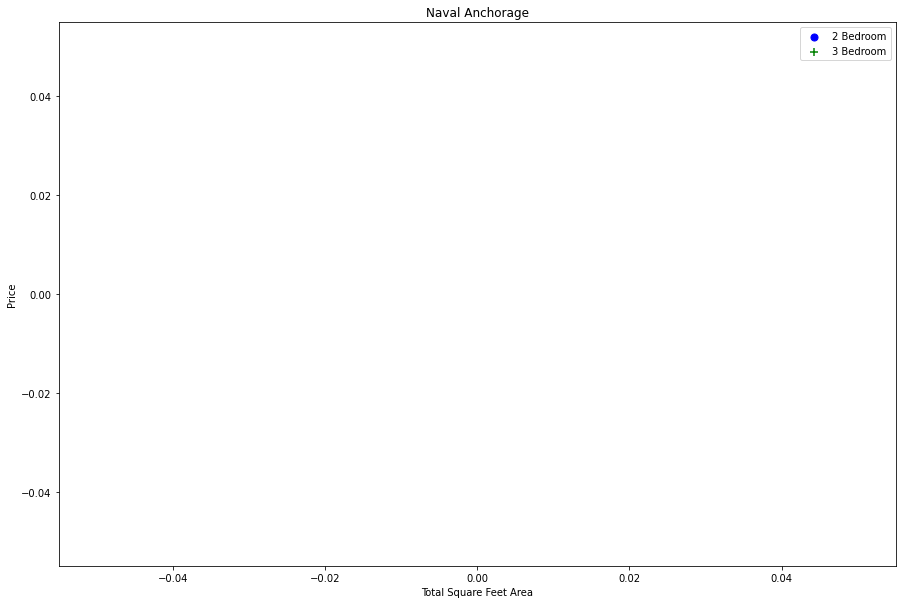

In [444]:
plot_scatter_chart(df,"Naval Anchorage")

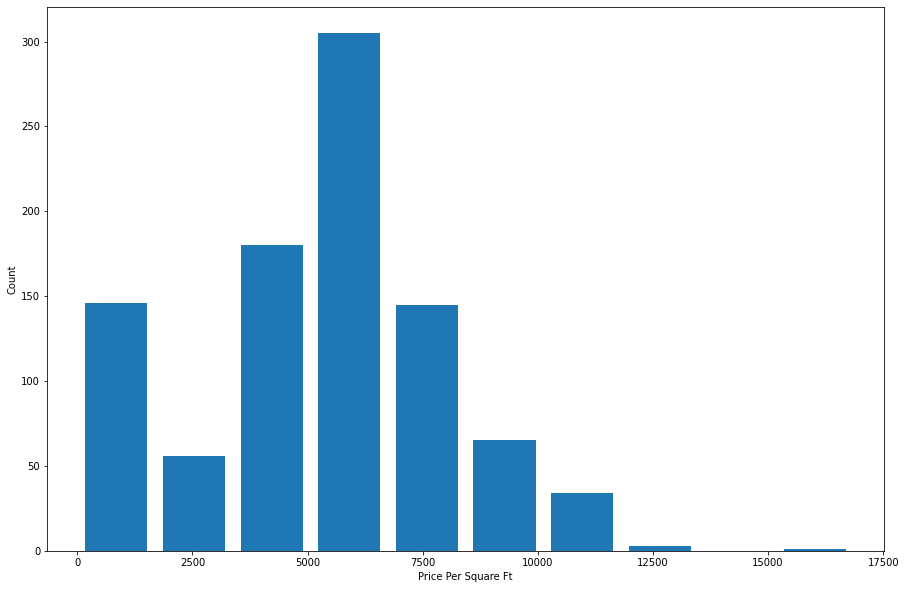

In [445]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(df['price_per_sqft'], rwidth=0.8)
plt.xlabel("Price Per Square Ft")
plt.ylabel("Count")
plt.show()

Then we plot the graph and 5000 price per square ft is the most common price 

In [446]:
df[df['baths'] > df['bedrooms']]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
12,25000,Al Najaf Colony,3,1361.25,2,18.365473
20,8800000,Al Noor Garden,5,1361.25,4,6464.646465
21,10000000,Al Noor Garden,4,1932.98,3,5173.359269
23,7000000,Al Noor Garden,5,980.10,3,7142.128354
25,9000000,Al Noor Garden,5,1361.25,4,6611.570248
...,...,...,...,...,...,...
1252,20000000,others,5,2722.51,4,7346.162181
1256,9500000,others,4,1361.25,3,6978.879706
1258,11000000,others,5,2178.01,4,5050.481862
1267,5200000,others,3,816.75,2,6366.697276


In [447]:
df[df['baths'] > (df['bedrooms'] + 2)]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
173,7500000,Civil Lines,4,1089.00,1,6887.052342
317,42500000,Eden Valley,8,4083.76,5,10407.075832
376,18500000,Eden Valley,7,1905.76,4,9707.413315
661,16000000,Millat Road,4,5445.02,1,2938.464872
667,6000000,Millat Town,6,1361.25,3,4407.713499
826,7200000,Samundari Road,6,1361.25,3,5289.256198
864,16000000,Satiana Road,7,2178.01,4,7346.155435
936,15000000,Satiana Road,7,2096.33,4,7155.361990
962,25000000,Wapda City,10,4083.76,5,6121.809313
963,39000000,Wapda City,8,5445.02,5,7162.508127


In [448]:
df = df.drop(df[df['baths'] > (df['bedrooms'] + 2)].index)
df.shape

(923, 6)

In [449]:
df1 = df.drop("price_per_sqft", axis=1)

In [450]:
dummies = pd.get_dummies(df1['location'])
dummies.head(3)

,Ahmadabad,Al Najaf Colony,Al Noor Garden,Amin Town,Canal Road,Citi Housing Society,Civil Lines,D Ground,D Type Colony,Eden Gardens,...,Samundari Road,Sargodha Road,Satiana Road,Shahbaz Town,Shalimar Park,Sheikh Colony,Susan Road,Usman Town,Wapda City,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [451]:
df1 = pd.concat([df1, dummies.drop('others', axis=1)], axis="columns")
df1 = df1.drop("location", axis=1)
df1.head()
df1.shape

(923, 59)

Then we concat them with our data...

# MODEL BUILDING 

In [452]:
X = df1.drop('price', axis=1) # Features
X.head()

,baths,area_sqft,bedrooms,Ahmadabad,Al Najaf Colony,Al Noor Garden,Amin Town,Canal Road,Citi Housing Society,Civil Lines,...,Samanabad,Samundari Road,Sargodha Road,Satiana Road,Shahbaz Town,Shalimar Park,Sheikh Colony,Susan Road,Usman Town,Wapda City
0,4,2450.26,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1089.00,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1361.25,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,5445.02,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2178.01,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [453]:
y = df1['price'] # Predictor or predicted_variable
y.head()

0    8500000
1    4500000
2    7500000
3      80000
4      30000
Name: price, dtype: int64

As the price of property is continuous so we will be using regression models 

In [454]:
from sklearn.model_selection import train_test_split # for dividing data into training and test sets
from sklearn.linear_model import LinearRegression # for predicting price


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5048876921885009

Note that our linear regression model performs with 83% accuracy which is quite good...

In [455]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.40937049, 0.39129654, 0.44033208, 0.37946642, 0.48577539])

Then use shuffle split for our cross validation and it gives the maximum accuracy of 86%...

In [456]:
# importing other regression models to find the best performing model using GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [457]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model':LinearRegression(),
            'params': {'normalize':[True,False]}
    
        },'decision_tree_regressor':{
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['mse','friedman_mse'], 'splitter':['best','random']}
        },'lasso': {
            'model':Lasso(),
            'params': {'alpha':[1,2], 'selection':['random','cyclic']}
        }
    }
    
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = []
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], return_train_score=False, n_jobs=-1, cv=cv)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_ ,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [458]:
find_best_model_using_gridsearchcv(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.421248,{'normalize': False}
1,decision_tree_regressor,0.556739,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,lasso,0.421250,"{'alpha': 2, 'selection': 'random'}"


As decision_tree_regressor performs the best with 93% accuracy we will be using its best params and bulding our model...

In [459]:
len(X.columns)

58

In [460]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', splitter='random', random_state=0)
dtr.fit(X.values, y)

DecisionTreeRegressor(criterion='friedman_mse', random_state=0,
                      splitter='random')

In [461]:
data_column=X.columns
import json
with open('data_column_Faisalabad.json', 'w') as f:
    json.dump(list(data_column), f)

In [462]:
def predict_price(location, sqft, bedrooms, baths):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = sqft
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
    return dtr.predict([x])[0] / 100000

In [463]:
#print(str(int(predict_price('G-11', 1800, 4, 3))) + " Lakhs")

In [464]:
#print(str(int(predict_price('H8', 1080, 3, 2))) + " Lakhs")

In [465]:
import pickle

pickle_out = open("/kaggle/working/decessiontreeregresser_Faisalabad.pickle","wb")
pickle.dump(dtr, pickle_out)
pickle_out.close()